In [7]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
FULL_train = pd.read_csv('../../#Data/santander-customer-transaction-prediction/train.csv', index_col='ID_code')

In [17]:
FULL_train

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995


In [18]:
FULL_train.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [19]:
#sns.set(style="ticks", color_codes=True)
#sns.pairplot(FULL_train, hue='target')

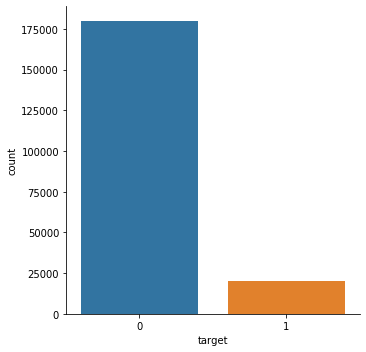

In [20]:
sns.catplot(x='target', data=FULL_train, kind="count")

In [21]:
FULL_train.groupby('target').count()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,,,,,,,,,,,,,,,,,,,,,
0,179902,179902,179902,179902,179902,179902,179902,179902,179902,179902,...,179902,179902,179902,179902,179902,179902,179902,179902,179902,179902
1,20098,20098,20098,20098,20098,20098,20098,20098,20098,20098,...,20098,20098,20098,20098,20098,20098,20098,20098,20098,20098


In [22]:
FULL_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [23]:
20098/ 179902

0.1117163789174106

In [3]:
y = FULL_train['target']
X = FULL_train.drop(['target'], axis=1)

#perm 'balanced accuracy' extract
#X = X[['var_81', 'var_139', 'var_12', 'var_110', 'var_26', 'var_146', 'var_6', 'var_53', 'var_22']]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1861, stratify=y)

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
    
def custom_score(clf):
    

    #clf.score(X_test, y_test, sample_weight=y_test)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print('TN: {}, FP: {}, FN: {}, TP: {}'.format(tn, fp, fn, tp))
    #print(balanced_accuracy_score(y_test, y_pred))
    #print(roc_auc_score(y_test, y_pred)) #proper way #or not(see ratings on the site)
    

    print("(non-proba)roc_auc_score on training set: {:.3f}".format((roc_auc_score(y_train, clf.predict(X_train)))))
    print("(non-proba)roc_auc_score on test set: {:.3f}".format((roc_auc_score(y_test, y_pred))))
    print("(proba)roc_auc_score on test set: {:.3f}".format(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))) #proper way #or not(see ratings on the site)

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=2, random_state=1861, n_jobs=-1, class_weight='balanced_subsample')
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1861, verbose=0, warm_start=False)

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

param_grid = {'n_estimators': [100, 150, 200, 250, 300, 350],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
             'min_samples_split': [2, 3, 4, 5],
             'random_state': [1861],
             'n_jobs': [-1],
             'class_weight': ['balanced_subsample']}

#grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='balanced_accuracy')
#grid_search.fit(X_train, y_train)

#Relaxed grid search(coz not worth the effort for pure RF/feature selection purpose):
best_score = 0
best_parameters = None

for n_estimators in [100]:
    for max_depth in [1, 2, 3, 4, 5, 6, 7, 8]:
        for min_samples_split in [2]:
            forest = RandomForestClassifier(n_estimators=n_estimators,
                                            max_depth=max_depth,
                                            min_samples_split=min_samples_split,
                                            random_state=1861,
                                            n_jobs=-1,
                                            class_weight='balanced_subsample')
            forest.fit(X_train, y_train)
            score = roc_auc_score(y_test, forest.predict(X_test))
            print("parameters: max_depth={} min_samples_split={}".format(max_depth, min_samples_split))
            print("score: {:}".format(score))
            if score > best_score:
                best_score = score
                best_parameters = {'n_estimators': n_estimators,
                                  'max_depth': max_depth,
                                  'min_samples_split': min_samples_split}

print("Best parameters: {}".format(best_parameters))
print("Best score: {:.2f}".format(best_score))

parameters: max_depth=1 min_samples_split=2
score: 0.6770252522441768
parameters: max_depth=2 min_samples_split=2
score: 0.6886734912794603
parameters: max_depth=3 min_samples_split=2
score: 0.6932795982941872
parameters: max_depth=4 min_samples_split=2
score: 0.6967407633223373
parameters: max_depth=5 min_samples_split=2
score: 0.6995050701423636
parameters: max_depth=6 min_samples_split=2
score: 0.7011716704325086
parameters: max_depth=7 min_samples_split=2
score: 0.6972461673428564
parameters: max_depth=8 min_samples_split=2
score: 0.6989675785874686
Best parameters: {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 2}
Best score: 0.70


In [102]:
'''
import lightgbm as lgb

lgb_train = lgb.Dataset(train[feature_cols], label=train['is_attributed'])
lgb_test = lgb.Dataset(test[feature_cols], label=test['is_attributed'])

param = {'num_leaves': 64, 'objective': 'binary'}
param['metric'] = 'auc'
num_round = 100
lgb_model = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=10)
'''

"\nimport lightgbm as lgb\n\nlgb_train = lgb.Dataset(train[feature_cols], label=train['is_attributed'])\nlgb_test = lgb.Dataset(test[feature_cols], label=test['is_attributed'])\n\nparam = {'num_leaves': 64, 'objective': 'binary'}\nparam['metric'] = 'auc'\nnum_round = 100\nlgb_model = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=10)\n"

In [11]:
import lightgbm as lgb

def auc_custom(y_true, y_pred):
    return 'auc_custom', roc_auc_score(y_test, y_pred), False


lgb_clf = lgb.sklearn.LGBMClassifier(max_depth=6, bagging_fraction=0.8, bagging_freq=1, min_child_weight=850, num_leaves=17, n_estimators=300, objective='binary', class_weight='balanced', silent='false', random_state=273, importance_type='gain')
#lgb_clf.fit(X_train, y_train, eval_metric='auc', early_stopping_rounds=10, eval_set=[(X_test, y_test)])
lgb_clf.fit(X_train, y_train, eval_metric='auc')

LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, boosting_type='gbdt',
               class_weight='balanced', colsample_bytree=1.0,
               importance_type='gain', learning_rate=0.1, max_depth=6,
               min_child_samples=20, min_child_weight=850, min_split_gain=0.0,
               n_estimators=300, n_jobs=-1, num_leaves=17, objective='binary',
               random_state=273, reg_alpha=0.0, reg_lambda=0.0, silent='false',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [317]:
custom_score(lgb_clf)

TN: 45296, FP: 8675, FN: 1400, TP: 4629
(non-proba)roc_auc_score on training set: 0.853
(non-proba)roc_auc_score on test set: 0.804
(proba)roc_auc_score on test set: 0.887


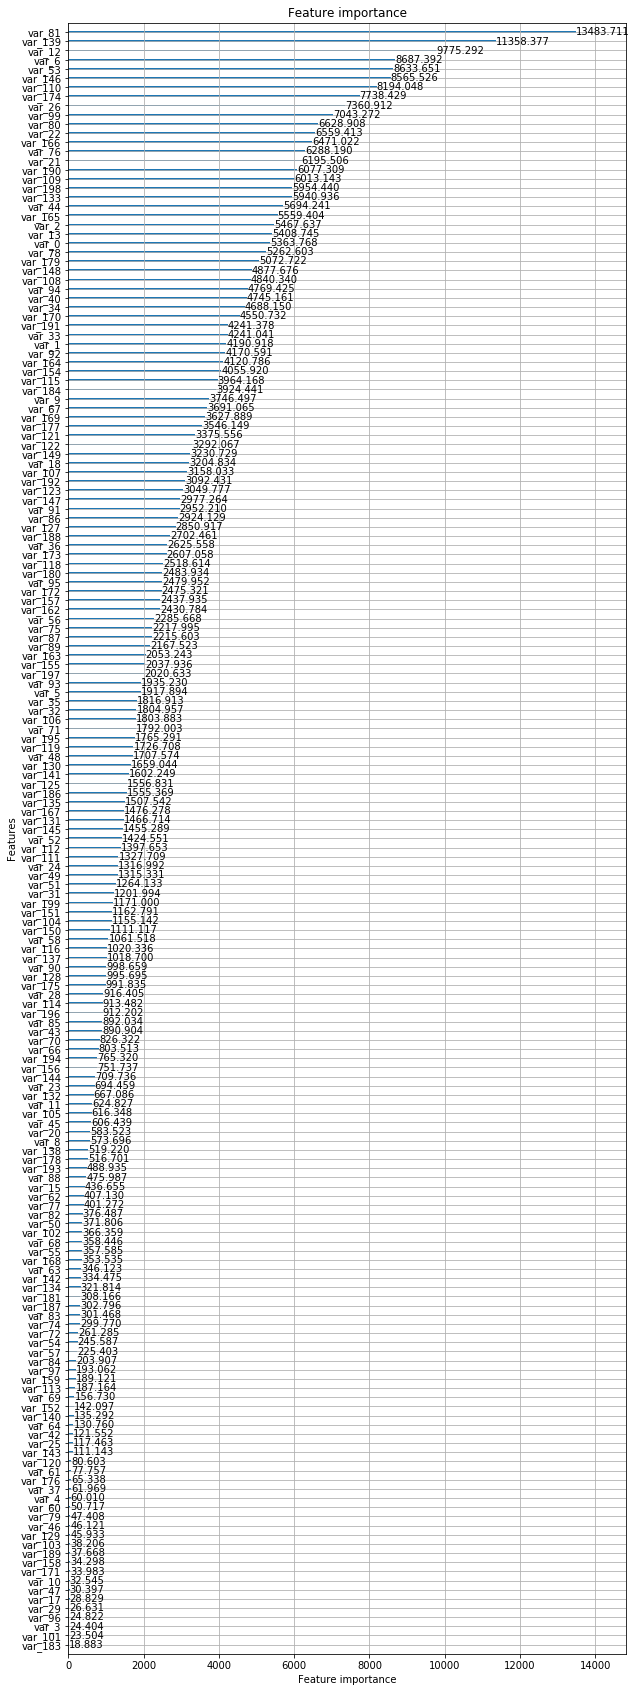

In [337]:
lgb_clf.best_score_
lgb_clf.feature_importances_

#plt.figure(figsize=(14,37))
lgb.plot_importance(lgb_clf, importance_type='gain', figsize=(10,30))

In [12]:
features = X.columns
fimp = pd.DataFrame(lgb_clf.feature_importances_, index=features, columns=['gain'])
fimp

,gain
var_0,5363.767586
var_1,4190.917675
var_2,5467.636623
var_3,24.403799
var_4,60.009901
...,...
var_195,1765.290512
var_196,912.202316
var_197,2020.632702
var_198,5954.440306


In [13]:
fimp.describe()

,gain
count,200.000000
mean,2024.236822
std,2457.350470
min,0.000000
25%,153.071526
50%,1040.926649
75%,3060.440329
max,13483.711338


In [14]:
imps = fimp[fimp['gain'] > fimp.quantile(.9)[0]].sort_values(by='gain', ascending=False)
imps = imps.reset_index().rename(columns={'index': 'feature'})
#fimp.quantile(.9)
print(len(imps))
imps

20


,feature,gain
0,var_81,13483.711338
1,var_139,11358.377327
2,var_12,9775.292177
3,var_6,8687.392206
4,var_53,8633.651457
5,var_146,8565.526169
6,var_110,8194.048292
7,var_174,7738.429237
8,var_26,7360.911989
9,var_99,7043.271509


In [15]:
X_imp = X.loc[:, imps['feature']]
X_imp

,var_81,var_139,var_12,var_6,var_53,var_146,var_110,var_174,var_26,var_99,var_80,var_22,var_166,var_76,var_21,var_190,var_109,var_198,var_133,var_44
ID_code,,,,,,,,,,,,,,,,,,,,
train_0,13.8372,15.6599,14.0137,5.1187,5.1736,11.5659,2.0323,18.5618,-5.1488,-3.4132,13.6468,2.5791,2.7004,-2.3440,16.2191,4.4354,24.3627,12.7803,6.5674,11.6418
train_1,18.1782,16.1622,14.0239,5.6208,6.6885,8.9231,6.6203,30.2645,-11.7684,0.6939,2.5462,8.5524,3.2003,3.2709,2.7407,7.6421,13.0858,18.3560,7.0513,1.2444
train_2,15.7811,8.6674,14.1929,6.9427,6.4059,11.4934,3.2304,25.6820,-7.9940,-0.0269,7.4729,1.2145,3.2790,4.5048,18.1377,2.9057,20.3882,14.7222,6.6231,4.1006
train_3,10.5404,8.9821,13.8463,5.8428,5.2091,10.4994,4.2827,14.7483,0.8135,1.9480,0.7839,6.8202,2.5881,11.6875,12.5579,4.4666,14.4135,17.9697,7.1954,8.0485
train_4,13.3317,13.9547,13.8481,5.9405,5.7555,11.5670,-0.1937,18.4685,3.1736,0.6715,2.9598,10.1102,3.2304,1.0273,18.9608,-1.4905,28.2749,17.9974,6.6173,6.9087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_199995,16.3870,23.7116,13.9860,5.6709,6.1868,13.2491,-0.6364,11.3529,2.9085,-1.6930,-5.7878,1.0914,2.6529,17.6422,25.1376,6.1415,19.0369,16.6660,7.4108,4.2600
train_199996,17.9954,0.8270,14.4131,5.8802,4.5666,3.7881,13.3224,27.1264,5.2281,-0.2476,11.4812,0.8982,3.3696,14.0155,18.2345,4.9611,13.1205,15.9054,6.9125,8.9282
train_199997,16.9399,1.0527,13.8775,4.5555,6.0771,12.2434,3.4797,32.0032,4.9473,-1.1083,11.9537,3.1008,3.1693,-4.1948,3.1453,4.0651,15.2503,13.8329,7.1081,11.8492


In [24]:
X_imp_train, X_imp_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.3, random_state=273, stratify=y)

from sklearn.preprocessing import RobustScaler #because i don't wanna bother with outliers checking to justify other scalers
robuster = RobustScaler().fit(X_imp_train)
X_imp_train = robuster.transform(X_imp_train)
X_imp_test = robuster.transform(X_imp_test)
#robust scaler gave no prediction increase, but perfomance increase
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2).fit(X_imp_train)
X_imp_train = poly.transform(X_imp_train)
X_imp_test = poly.transform(X_imp_test)

def imp_custom_score(clf):
    y_pred = clf.predict(X_imp_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print('TN: {}, FP: {}, FN: {}, TP: {}'.format(tn, fp, fn, tp))

    print("(non-proba)roc_auc_score on training set: {:.3f}".format((roc_auc_score(y_train, clf.predict(X_imp_train)))))
    print("(non-proba)roc_auc_score on test set: {:.3f}".format((roc_auc_score(y_test, y_pred))))
    print("(proba)roc_auc_score on test set: {:.3f}".format(roc_auc_score(y_test, clf.predict_proba(X_imp_test)[:,1])))

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#micro_X_tn, _, micro_y_tn, _ = train_test_split(X_imp_train, y_train, test_size=0.9, random_state=273, stratify=y_train)
linear_clf = LogisticRegression(class_weight='balanced')
#linear_clf = SVC(class_weight='balanced', kernel='linear', gamma='scale', C=0.01)
#linear_clf.fit(micro_X_tn, micro_y_tn)
linear_clf.fit(X_imp_train, y_train)

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#len(micro_X_tn)
X_imp_train.shape[1]

231

In [69]:
imp_custom_score(linear_clf)

TN: 38915, FP: 15056, FN: 1960, TP: 4069
(non-proba)roc_auc_score on training set: 0.700
(non-proba)roc_auc_score on test set: 0.698
(proba)roc_auc_score on test set: 0.764


In [323]:
import eli5
from eli5.sklearn import PermutationImportance

#'balanced_accuracy'
#perm = PermutationImportance(clf, random_state=1861, scoring='roc_auc').fit(X_test, y_test)
perm = PermutationImportance(lgb_clf, random_state=1861, scoring='roc_auc').fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0084 ± 0.0007,var_81
0.0062 ± 0.0005,var_139
0.0054 ± 0.0009,var_53
0.0052 ± 0.0005,var_110
0.0051 ± 0.0005,var_12
0.0050 ± 0.0007,var_26
0.0049 ± 0.0003,var_6
0.0044 ± 0.0006,var_174
0.0044 ± 0.0006,var_22
0.0042 ± 0.0005,var_166


In [38]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

'\n[53110   861  3856  2173]\n0.6722358012806365\n'

In [325]:
#Epilogue
#clf = GaussianNB()
#clf.fit(X, y)

# read test data file using pandas
test_data = pd.read_csv('../../#Data/santander-customer-transaction-prediction/test.csv', index_col='ID_code')

# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
#test_X = test_data[features]
test_X = test_data

# make predictions which we will submit. 
#test_preds = clf.predict(test_X)
test_preds = lgb_clf.predict(test_X)

In [326]:
# The lines below shows how to save predictions in format used for competition scoring
# Just uncomment them.

output = pd.DataFrame({'ID_code': test_data.index,
                       'target': test_preds})
output.to_csv('submission.csv', index=False)

In [53]:
output

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0
